### **Crawl data**

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from time import sleep
import csv

In [13]:
chrome_options = Options()
driver = webdriver.Chrome(options=chrome_options)
chrome_options.add_argument("--headless")
driver.get("https://www.fifaratings.com/players")
sleep(2)

indexs_to_skip = [10, 21, 32, 43, 54, 65, 76, 87, 98]
source = BeautifulSoup(driver.page_source, "html.parser")
table = source.find("table",class_="table table-striped table-sm table-hover mb-0").find("tbody")
players = table.find_all("tr")
with open("player.csv",mode = "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(['Name', 'Club', 'Position', 'OVA', 'POT', 'ATT', 'SKI', 'MOV', 'POW', 'MEN', 'DEF', 'GK', 'STATS'])
    for index, player in enumerate(players):
        if index in indexs_to_skip:
            continue
        name = player.find("span",class_="entry-font entry-font-narrow").get_text(' ', strip=True)
        club = player.find("a",class_="text-dark").get_text(' ',strip=True)
        position = player.find("span",class_ = "entry-subtext-font").get_text(' ',strip=True)
        td = player.find_all("td")
        OVA = td[2].get_text(' ',strip=True)
        POT = td[3].get_text(' ',strip=True)
        ATT = td[4].get_text(' ',strip=True)
        SKI = td[5].get_text(' ',strip=True)
        MOV = td[6].get_text(' ',strip=True)
        POW = td[7].get_text(' ',strip=True)
        MEN = td[8].get_text(' ',strip=True)
        DEF = td[9].get_text(' ',strip=True)
        GK  = td[10].get_text(' ',strip=True)
        STATS = td[11].get_text(' ',strip=True)       
        writer.writerow([name, club, position, OVA, POT, ATT, SKI, MOV, POW, MEN, DEF, GK, STATS])          

### **Clustering**

#### Process data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data = pd.read_csv("player.csv")
data.head(5)

,Name,Club,Position,OVA,POT,ATT,SKI,MOV,POW,MEN,DEF,GK,STATS
0,Kylian Mbappé,Paris Saint-Germain,ST,91,94,82,81,92,82,74,31,8,"2,204"
1,Erling Haaland,Manchester City,ST,91,94,76,70,82,86,75,42,10,"2,156"
2,Kevin De Bruyne,Manchester City,CM,91,91,82,89,79,82,83,62,11,"2,317"
3,Lionel Messi,Inter Miami CF,CAM,90,90,85,93,88,77,74,26,11,"2,166"
4,Karim Benzema,Al Ittihad,CF,90,90,87,82,80,82,76,28,8,"2,152"


In [5]:
data.columns = data.columns.str.strip()
data.columns

Index(['Name', 'Club', 'Position', 'OVA', 'POT', 'ATT', 'SKI', 'MOV', 'POW',
       'MEN', 'DEF', 'GK', 'STATS'],
      dtype='object')

In [6]:
features = ["OVA","POT","SKI","POW","STATS"]
df = data.dropna(subset=features)
df = data[features].copy()

In [7]:
df["STATS"] = df["STATS"].str.replace(",", ".").astype(float)

In [8]:
df

,OVA,POT,SKI,POW,STATS
0,91,94,81,82,2.204
1,91,94,70,86,2.156
2,91,91,89,82,2.317
3,90,90,93,77,2.166
4,90,90,82,82,2.152
...,...,...,...,...,...
95,84,84,87,81,2.167
96,84,84,84,70,2.215
97,84,86,70,83,2.206
98,84,84,23,52,1.282


#### Scale the data

In [9]:
df = ((df - df.min()) / (df.max() - df.min())) * 10 + 1 

In [51]:
df.head()

,OVA,POT,SKI,POW,STATS
0,11.000000,11.0,9.481013,9.75,9.780710
1,11.000000,11.0,8.088608,10.75,9.343949
2,11.000000,8.0,10.493671,9.75,10.808917
3,9.571429,7.0,11.000000,8.50,9.434941
4,9.571429,7.0,9.607595,9.75,9.307552


In [10]:
df.describe()

,OVA,POT,SKI,POW,STATS
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.514286,4.910000,7.940506,7.110000,8.093449
std,2.563721,2.558784,2.624623,2.671946,2.752758
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.428571,3.000000,7.329114,6.000000,7.890355
50%,3.857143,5.000000,9.037975,7.625000,9.093722
75%,5.642857,7.000000,9.607595,9.250000,9.817106
max,11.000000,11.000000,11.000000,11.000000,11.000000


#### Choose K by Elbow method

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

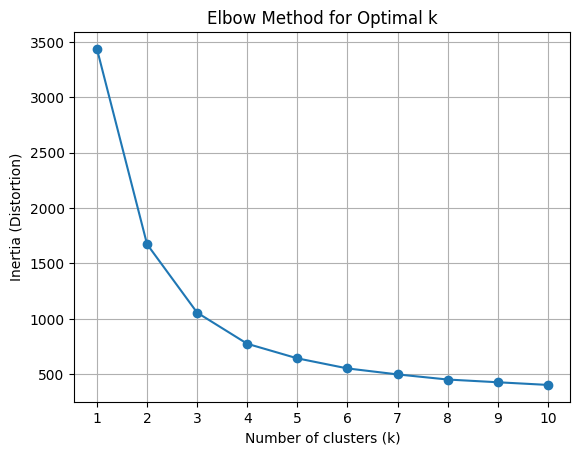

In [11]:
from sklearn.cluster import KMeans
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow Method
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Distortion)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show();

#### Initialize random centroids

In [12]:
def random_centroids(df,k): #--> Chọn ngẫu nhiên các giá trị từ mỗi cột
    centroids = []
    for i in range(k):
        centroid = df.apply(lambda x : float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis = 1)   

In [14]:
centroids = random_centroids(df, 5)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15536\3561664803.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = df.apply(lambda x : float(x.sample()))


In [52]:
df.head()

,OVA,POT,SKI,POW,STATS
0,11.000000,11.0,9.481013,9.75,9.780710
1,11.000000,11.0,8.088608,10.75,9.343949
2,11.000000,8.0,10.493671,9.75,10.808917
3,9.571429,7.0,11.000000,8.50,9.434941
4,9.571429,7.0,9.607595,9.75,9.307552


In [15]:
centroids

,0,1,2,3,4
OVA,1.000000,3.857143,6.714286,3.857143,8.142857
POT,6.000000,2.000000,8.000000,7.000000,2.000000
SKI,9.860759,7.075949,9.860759,9.227848,9.607595
POW,9.000000,3.000000,9.750000,1.000000,7.500000
STATS,1.691538,9.243858,8.170155,9.935396,10.481347


#### Label each data points

In [16]:
# Hàm này giúp gán chỉ số của cụm(centroid) gần nhất cho mỗi điểm trong dataFrame
def get_labels(df, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((df - x)**2).sum(axis=1))) # --> Tính khoảng cách Euclid
    return distances.idxmin(axis=1)

In [17]:
labels = get_labels(df, centroids)

In [18]:
labels.value_counts()

2    39
1    36
4    21
3     4
Name: count, dtype: int64

#### Update centroids

In [19]:
def new_centroids(df, labels, k):
    centroids = df.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T
    return centroids

In [20]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [21]:
def plot_cluster(df, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(df)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f"Iteration {iteration}")
    plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=labels)
    plt.scatter(x = centroids_2d[:,0],y=centroids_2d[:,1])
    plt.show()

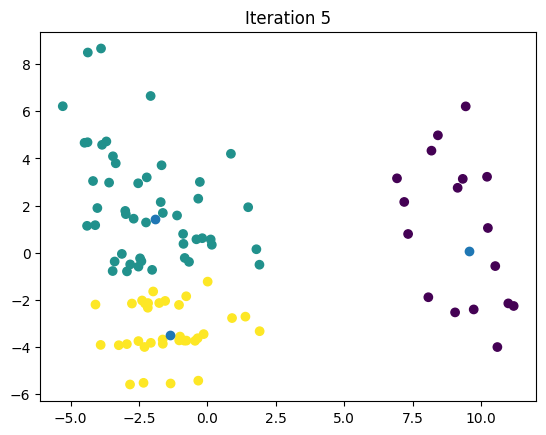

In [32]:
max_iteration = 100
centroid_count = 3

centroids = random_centroids(df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iteration and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(df, centroids)
    centroids = new_centroids(df, labels, centroid_count)
    plot_cluster(df, labels, centroids, iteration)
    iteration += 1

In [33]:
centroids

,0,1,2
OVA,4.194219,5.134500,2.441771
POT,3.759035,6.652186,2.312986
SKI,2.449663,8.902481,9.090893
POW,2.013452,7.996779,7.949926
STATS,2.235295,9.250518,9.142679


In [34]:
labels.value_counts()

1    48
2    35
0    17
Name: count, dtype: int64

### Showing results

In [36]:
data[labels == 0][["Name"] + ["Position"] + features] # --> GK

,Name,Position,OVA,POT,SKI,POW,STATS
5,T. Courtois,GK,90,90,22,50,"1,345"
13,M. ter Stegen,GK,89,89,29,53,"1,442"
15,Alisson,GK,89,90,32,48,"1,471"
22,Ederson,GK,88,89,33,55,"1,588"
23,Jan Oblak,GK,88,88,22,53,"1,393"
26,De Gea,GK,87,87,28,47,"1,302"
28,Gregor Kobel,GK,87,90,23,49,"1,272"
30,G. Donnarumma,GK,87,90,24,51,"1,370"
33,Mike Maignan,GK,87,89,36,55,"1,520"
37,Manuel Neuer,GK,87,87,34,57,"1,502"


In [37]:
data[labels == 1][["Name"] + ["Position"] + features]

,Name,Position,OVA,POT,SKI,POW,STATS
0,Kylian Mbappé,ST,91,94,81,82,"2,204"
1,Erling Haaland,ST,91,94,70,86,"2,156"
2,Kevin De Bruyne,CM,91,91,89,82,"2,317"
3,Lionel Messi,CAM,90,90,93,77,"2,166"
4,Karim Benzema,CF,90,90,82,82,"2,152"
6,Harry Kane,ST,90,90,80,85,"2,227"
7,R. Lewandowski,ST,90,90,82,85,"2,221"
8,Mohamed Salah,RW,89,89,82,80,"2,220"
9,Rúben Dias,CB,89,90,62,70,"1,904"
10,Vinícius Jr.,LW,89,94,79,75,"2,027"


In [38]:
data[labels == 2][["Name"] + ["Position"] + features]

,Name,Position,OVA,POT,SKI,POW,STATS
49,O. Dembélé,LM,86,87,79,67,"2,022"
52,S. Milinković-Savić,CM,86,86,83,86,"2,251"
53,A. Robertson,LB,86,86,79,73,"2,169"
54,N. Kanté,CDM,86,86,67,76,"2,107"
55,Paulo Dybala,CAM,86,86,88,75,"2,116"
56,João Cancelo,LB,86,86,82,77,"2,250"
57,Sadio Mané,LM,86,86,77,81,"2,145"
58,Parejo,CM,86,86,87,73,"2,184"
59,İ. Gündoğan,CM,86,86,85,74,"2,200"
61,Toni Kroos,CM,86,86,86,71,"2,169"


### **Using Library**

In [39]:
from sklearn.cluster import KMeans

In [40]:
kmeans = KMeans(3)
kmeans.fit(df)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [50]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [48]:
def plot_cluster(df, labels, centroids):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(df)
    centroids_2d = pca.transform(centroids)
    plt.scatter(data_2d[:,0], data_2d[:,1], c=labels)
    plt.scatter(centroids_2d[:,0], centroids_2d[:,1], marker='o', s=50, label='Centroids')
    plt.legend()
    plt.title('Clustering Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


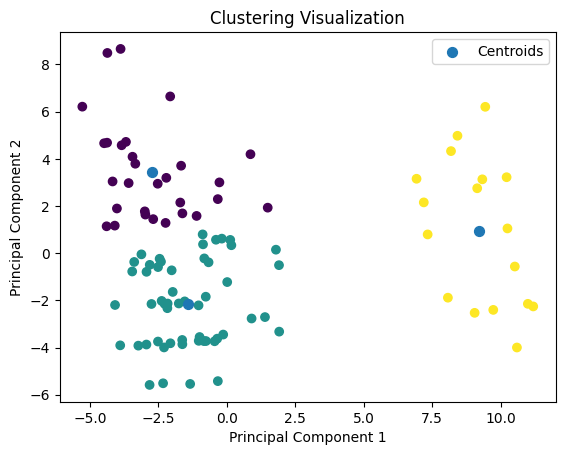

In [49]:
plot_cluster(df, labels, centroids)